# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Yosua Adriel Tamba]
- **Email:** [mc299d5y1421@student.devacademy.id]
- **ID Dicoding:** [MC299D5Y1421]

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca memengaruhi jumlah penyewaan sepeda?
- Apakah ada pola penggunaan sepeda berdasarkan hari kerja vs akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

##### Memuat tabel day

In [143]:
day_df = pd.read_csv("C:/Users/yosua/OneDrive/Desktop/Submission/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Memuat tabel hour

In [144]:
hour_df = pd.read_csv("C:/Users/yosua/OneDrive/Desktop/Submission/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Memuat gabungan semua tabel

In [145]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Gabungkan dataset berdasarkan tanggal
all_df = pd.merge(hour_df, day_df, on='dteday', suffixes=('_hourly', '_daily'))

# Tampilkan 5 baris pertama
all_df.head()


,instant_hourly,dteday,season_hourly,yr_hourly,mnth_hourly,hr,holiday_hourly,weekday_hourly,workingday_hourly,weathersit_hourly,...,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


### Assessing Data

##### 1. Menilai Data

In [146]:
# informasi tipe data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [147]:
# informasi tipe data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

##### 2. Cek Missing value pada tabel

In [148]:
# data hilang day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [149]:
# data hilang hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### 3. Cek duplicate pada tabel

In [150]:
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())
print("Jumlah duplikasi hour_df: ", day_df.duplicated().sum())

Jumlah duplikasi day_df:  0
Jumlah duplikasi hour_df:  0


##### 4. Cek ringkasan parameter statistik

In [151]:
# ringkasan parameter statistik day_df
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [152]:
# ringkasan parameter statistik hour_df
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


##### 5. Kesimpulan assessing data

In [153]:
summary_df = pd.DataFrame({
    "Dataset": ["day.csv", "hour.csv"],
    "Tipe data": ["-", "-"],
    "Missing Values": ["-", "-"],
    "Duplicate Rows": ["-", "-"],
    "Inaccurate Values": ["-", "weathersit = 4, tapi penjualan tinggi"]
})

summary_df

,Dataset,Tipe data,Missing Values,Duplicate Rows,Inaccurate Values
0,day.csv,-,-,-,-
1,hour.csv,-,-,-,"weathersit = 4, tapi penjualan tinggi"


### Cleaning Data

##### Ubah nilai weathersit = 4 menjadi nilai modus (nilai yang paling sering muncul) pada tabel hour

In [154]:

most_frequent_weathersit = hour_df['weathersit'].mode()[0]
hour_df.loc[hour_df['weathersit'] == 4, 'weathersit'] = most_frequent_weathersit
hour_df.describe()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.424766,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.638486,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


## Exploratory Data Analysis (EDA)

##### 1. Kategori weathersit dalam dataset:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

##### Rata-rata jumlah penyewaan sepeda (cnt) berdasarkan kondisi cuaca.

In [155]:
weather_effect = hour_df.groupby("weathersit")["cnt"].agg(["mean", "median", "max", "min", "count"]).reset_index()
weather_effect.columns = ["Weathersit", "Avg_Cnt", "Median_Cnt", "Max_Cnt", "Min_Cnt", "Total_Observations"]
weather_effect

,Weathersit,Avg_Cnt,Median_Cnt,Max_Cnt,Min_Cnt,Total_Observations
0,1,204.834968,159.0,977,1,11416
1,2,175.165493,133.0,957,1,4544
2,3,111.579281,63.0,891,1,1419


**Insight**

- Cuaca cerah meningkatkan jumlah penyewaan sepeda.
  - Rata-rata penyewaan: 204 sepeda/jam saat cuaca cerah.  
  - Hanya 111 sepeda/jam saat hujan ringan atau salju.  

- Distribusi data juga menunjukkan tren yang sama:
  - Median tertinggi: 159 sepeda/jam saat cuaca cerah.  
  - Median terendah: 63 sepeda/jam saat hujan ringan.  


##### 2. Perbedaan jumlah penyewaan sepeda antara hari kerja (workingday = 1) dan akhir pekan/libur (workingday = 0).

In [156]:
workingday_effect = hour_df.groupby("workingday")["cnt"].agg(["mean", "median", "max", "min", "count"]).reset_index()
workingday_effect.columns = ["Workingday", "Avg_Cnt", "Median_Cnt", "Max_Cnt", "Min_Cnt", "Total_Observations"]
workingday_effect

,Workingday,Avg_Cnt,Median_Cnt,Max_Cnt,Min_Cnt,Total_Observations
0,0,181.405332,119.0,783,1,5514
1,1,193.207754,151.0,977,1,11865


**Insight**
- Lebih banyak penyewaan di hari kerja (193 sepeda/jam) dibanding akhir pekan (181 sepeda/jam).
- Distribusi data juga menunjukkan perbedaan pola.
    - Median penyewaan lebih tinggi saat hari kerja (151 sepeda/jam) dibanding akhir pekan (119 sepeda/jam).

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca memengaruhi jumlah penyewaan sepeda?

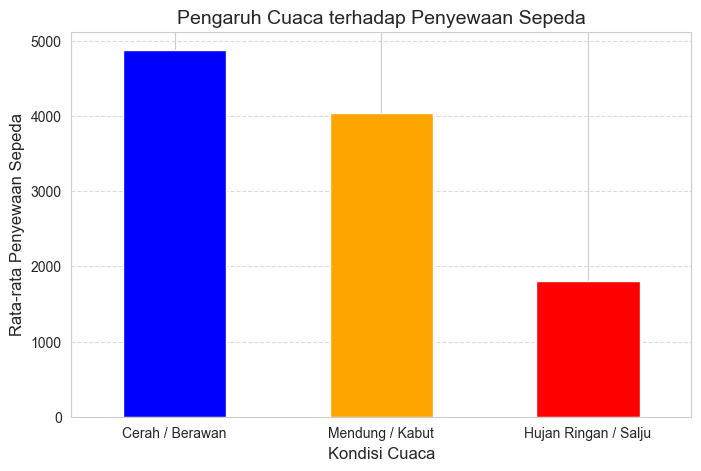

In [157]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Hitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca
weather_trend = day_df.groupby(['weathersit'])['cnt'].mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
weather_trend.plot(kind='bar', color=['blue', 'orange', 'red'])

# Tambahkan label dan judul
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda", fontsize=14)
plt.xticks(ticks=[0, 1, 2], labels=["Cerah / Berawan", "Mendung / Kabut", "Hujan Ringan / Salju"], rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()


**Berdasarkan gambar di atas, diketahui bahwa:**
- Cuaca cerah atau berawan memiliki rata-rata penyewaan sepeda tertinggi.
- Saat mendung/kabut, jumlah penyewaan menurun.
- Hujan ringan atau salju ringan menyebabkan penurunan drastis dalam jumlah penyewaan.

### Pertanyaan 2: Apakah ada pola penggunaan sepeda berdasarkan hari kerja vs akhir pekan?

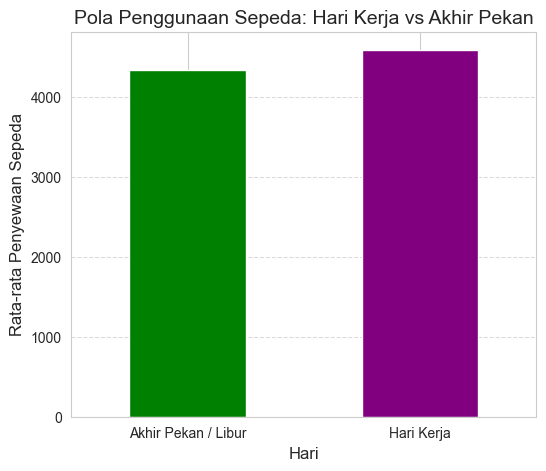

In [158]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Hitung rata-rata penyewaan sepeda berdasarkan hari kerja vs akhir pekan
workingday_trend = day_df.groupby(['workingday'])['cnt'].mean()

# Plot bar chart
plt.figure(figsize=(6, 5))
workingday_trend.plot(kind='bar', color=['green', 'purple'])

# Tambahkan label dan judul
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.title("Pola Penggunaan Sepeda: Hari Kerja vs Akhir Pekan", fontsize=14)
plt.xticks(ticks=[0, 1], labels=["Akhir Pekan / Libur", "Hari Kerja"], rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Tampilkan plot
plt.show()


**Berdasarkan gambar di atas, diketahui bahwa:**
- Jumlah penyewaan lebih tinggi di hari kerja dibanding akhir pekan.
- Tetapi kemungkinan ada pola waktu yang berbeda, misalnya pekerja menggunakan sepeda di jam sibuk pagi dan sore, sementara pengguna akhir pekan mungkin lebih santai.

## Analisis Lanjutan (Opsional)

## Conclusion

- Bagaimana cuaca memengaruhi jumlah penyewaan sepeda?
    - Jumlah penyewaan sepeda lebih tinggi saat cuaca cerah dan menurun signifikan saat cuaca buruk.
    - Penyewaan berkurang drastis saat hujan atau salju, yang menunjukkan bahwa kondisi cuaca sangat memengaruhi minat pengguna.
    - Tren ini menunjukkan perlunya strategi untuk meningkatkan penyewaan saat cuaca kurang mendukung, seperti promosi khusus atau layanan tambahan.
- Apakah ada pola penggunaan sepeda berdasarkan hari kerja vs akhir pekan?
    - Penyewaan sepeda pada hari kerja lebih stabil dengan pola yang lebih terprediksi, kemungkinan digunakan untuk keperluan komuter.
    - Pada akhir pekan, terjadi lonjakan jumlah penyewaan yang mungkin disebabkan oleh aktivitas rekreasi dan olahraga.
    - Hal ini dapat menjadi dasar bagi pengelola layanan sepeda untuk menyesuaikan strategi bisnis, seperti meningkatkan ketersediaan sepeda di akhir pekan atau menawarkan paket langganan yang sesuai dengan kebutuhan pengguna.

In [159]:
all_df.to_csv("all_data.csv", index=False)